## Importing modules

In [43]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from matplotlib.pyplot import figure
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
clvData1 = pd.read_csv("clvData1.csv",sep=",")

In [3]:
clvData1.head()

,customerID,nOrders,nItems,daysSinceLastOrder,margin,returnRatio,shareOwnBrand,shareVoucher,shareSale,gender,age,marginPerOrder,marginPerItem,itemsPerOrder,futureMargin
0,2,4,7,4,35.77,0.25,0.67,0.17,0.00,female,56,8.94,5.11,1.75,57.62
1,3,3,4,272,25.74,0.44,0.33,0.00,0.67,male,37,8.58,6.43,1.33,29.69
2,4,12,25,12,63.32,0.15,0.86,0.38,0.29,male,32,5.28,2.53,2.08,56.26
3,5,16,29,32,53.74,0.03,0.96,0.17,0.33,female,43,3.36,1.85,1.81,58.84
4,6,1,2,47,35.85,0.00,1.00,0.00,1.00,male,48,35.85,17.93,2.00,29.31


In [4]:
clvData1.dtypes

customerID              int64
nOrders                 int64
nItems                  int64
daysSinceLastOrder      int64
margin                float64
returnRatio           float64
shareOwnBrand         float64
shareVoucher          float64
shareSale             float64
gender                 object
age                     int64
marginPerOrder        float64
marginPerItem         float64
itemsPerOrder         float64
futureMargin          float64
dtype: object

### Data Description

Variable                          Description

id	                              identification number of customer
mostFreqStore	                  store person bought mostly from
mostFreqCat	                      category person purchased mostly
nCats	                          number of different categories
preferredBrand	                  brand person purchased mostly
nBrands	                          number of different brands

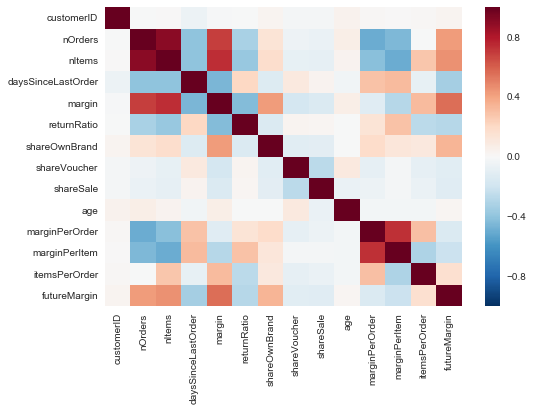

In [5]:
# calculate the correlation matrix
corr = clvData1.corr()

# plot the heatmap
sns.heatmap(corr)
plt.show()

## Linear Regression

In [35]:
X = clvData1["margin"]
y = clvData1["futureMargin"]

# Fit and make the predictions by the model
model = sm.OLS(y,X).fit()
predictions = model.predict(y)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           futureMargin   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 1.951e+04
Date:                Thu, 31 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:17:36   Log-Likelihood:                -17380.
No. Observations:                4191   AIC:                         3.476e+04
Df Residuals:                    4190   BIC:                         3.477e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
margin         0.9815      0.007    139.684      0.000       0.968       0.995
==============================================================================
Omnibus:                       30.946   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.962
Skew:                          -0.131   Prob(JB):                     5.71e-09
Kurtosis:                       3.386   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

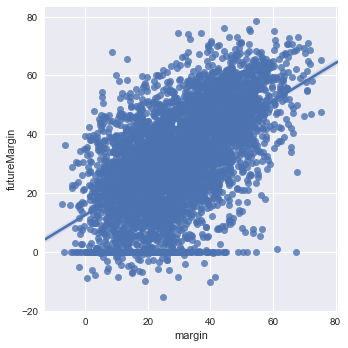

In [29]:
# Plot outputs
sns.lmplot(data=clvData1,
           x='margin',
           y='futureMargin')
plt.show()

In [60]:
X_c = clvData1[["nOrders","nItems","daysSinceLastOrder","margin","returnRatio","shareOwnBrand",
                             "shareVoucher","shareSale","age","marginPerOrder",
                             "marginPerItem","itemsPerOrder"]]

In [61]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_c.values, i) for i in range(X_c.shape[1])]
vif["features"] = X_c.columns

In [62]:
vif.round(1)

,VIF Factor,features
0,18.0,nOrders
1,19.6,nItems
2,2.7,daysSinceLastOrder
3,16.0,margin
4,2.6,returnRatio
5,2.3,shareOwnBrand
6,2.5,shareVoucher
7,1.6,shareSale
8,8.9,age
9,22.3,marginPerOrder


In [36]:
reg = linear_model.LinearRegression()
model = reg.fit(clvData1[["margin"]], clvData1[["futureMargin"]])
print(model.coef_)
print(model.intercept_)

[[ 0.64542729]]
[ 12.63067744]


In [42]:
X_C= clvData1[["nOrders","nItems","daysSinceLastOrder","margin","returnRatio","shareOwnBrand",
                             "shareVoucher","shareSale","age","marginPerOrder",
                             "marginPerItem","itemsPerOrder"]]
y_C = clvData1[["futureMargin"]]
Multireg = reg.fit(y_C,X_C)
print('Coefficients: \n',Multireg.coef_)
print( 'Intercept: \n',Multireg.intercept_)

Coefficients: 
 [[ 0.14689918]
 [ 0.29239849]
 [-1.84433865]
 [ 0.48949626]
 [-0.00671175]
 [ 0.00731478]
 [-0.00226313]
 [-0.00235039]
 [ 0.01603643]
 [-0.05884881]
 [-0.06747932]
 [ 0.009422  ]]
Intercept: 
 [  4.73130803e-01  -8.99638535e-02   1.57679925e+02   1.44256726e+01
   6.83007839e-01   6.29876998e-02   4.65138034e-01   3.24849544e-01
   3.85772568e+01   1.16967494e+01   8.57740245e+00   1.49628624e+00]


In [64]:
# Fit and make the predictions by the model
model1 = sm.OLS(y_C,X_C).fit()


# Print out the statistics
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           futureMargin   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1928.
Date:                Thu, 31 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:46:13   Log-Likelihood:                -17078.
No. Observations:                4191   AIC:                         3.418e+04
Df Residuals:                    4179   BIC:                         3.426e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
nOrders                0.6385      0.119      5.370      0.000       0.405       0.872
nItems                -0.2780      0.068     -4.091      0.000      -0.411      -0.145
daysSinceLastOrder    -0.0045      0.003     -1.703      0.089      -0.010       0.001
margin                 0.5606      0.026     21.404      0.000       0.509       0.612
returnRatio            1.6224      0.575      2.822      0.005       0.495       2.749
shareOwnBrand          7.5359      0.699     10.781      0.000       6.165       8.906
shareVoucher           1.0859      0.663      1.638      0.101      -0.214       2.385
shareSale              0.2443      0.680      0.359      0.720      -1.089       1.578
age                    0.1104      0.016      6.919      0.000       0.079       0.142
marginPerOrder        -0.7842      0.086     -9.089      0.000      -0.953      -0.615
marginPerItem          0.8713      0.099      8.833      0.000       0.678       1.065
itemsPerOrder          4.8320      0.465     10.384      0.000       3.920       5.744
==============================================================================
Omnibus:                       46.515   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.505
Skew:                          -0.243   Prob(JB):                     2.93e-11
Kurtosis:                       3.206   Cond. No.                         493.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_C.values, i) for i in range(X_C.shape[1])]
vif["features"] = X_C.columns

In [54]:
vif.round(1)

,VIF Factor,features
0,18.0,nOrders
1,19.6,nItems
2,2.7,daysSinceLastOrder
3,16.0,margin
4,2.6,returnRatio
5,2.3,shareOwnBrand
6,2.5,shareVoucher
7,1.6,shareSale
8,8.9,age
9,22.3,marginPerOrder


In [55]:
def calculate_vif(X):
    thresh = 5.0
    output = pd.DataFrame()
    k = X.shape[1]
    vif = [variance_inflation_factor(X.values, j) for j in range(X.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = X.drop(X.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)
train_out = calculate_vif(X_C)

Iteration no.
1
[18.031017451447561, 19.575146030657724, 2.6672449658337873, 16.009282083952243, 2.6195976808502257, 2.2555341097116783, 2.4884697061743299, 1.6445108040802134, 8.8525776827474196, 22.309805705763186, 14.184381010411329, 19.088361777965194]
Max VIF is for variable no.:
9
Iteration no.
2
[17.248230484939864, 16.636970393627724, 2.6665570032536303, 16.003681962157156, 2.5940505364596786, 2.2346254569758828, 2.3920501346419769, 1.5919007043359505, 8.5777825088798849, 3.635499784052612, 7.6323308091393631]
Max VIF is for variable no.:
0
Iteration no.
3
[4.8175534935846365, 2.651911323437488, 13.68103109556038, 2.579548953556396, 2.2101608925570893, 2.3557862228525575, 1.5713837064741367, 8.2422282109690119, 3.5650762558226665, 4.4374093812001192]
Max VIF is for variable no.:
2
Iteration no.
4
[2.4552380776223157, 2.5762381639082288, 2.5643589988389262, 1.8966118006361592, 2.3556653549209048, 1.5692381966593123, 7.0262291970109452, 3.2425126745059454, 3.8408384610580919]
Max

In [56]:
train_out.head()

,nItems,daysSinceLastOrder,returnRatio,shareOwnBrand,shareVoucher,shareSale,marginPerItem,itemsPerOrder
0,7,4,0.25,0.67,0.17,0.00,5.11,1.75
1,4,272,0.44,0.33,0.00,0.67,6.43,1.33
2,25,12,0.15,0.86,0.38,0.29,2.53,2.08
3,29,32,0.03,0.96,0.17,0.33,1.85,1.81
4,2,47,0.00,1.00,0.00,1.00,17.93,2.00


In [65]:
print(model1.aic)

34179.1514096
